# <p style="padding:15px;background:yellow;text-align:center;text-decoration:underline">Assigment 7<p>

## - Import Libraries

Import necessary libraries used in these assignment.

In [2]:
import numpy as np
import pandas as pd
import math
import operator
import matplotlib.pyplot as plt
import matplotlib as mpl

## - Read File (without header) given a delimeter

Reads a file with a given delimeter and returns the converted numpy array.
<br>
Default when no delimeter is given it reads file as in csv format.

In [3]:
def readFile(trainFile,seperator=",",sample=False):
    try:
        data=pd.read_csv(trainFile, sep=seperator, header=None)
        if sample:
            data=data.sample(frac=1)
        return data.values
    except:
        print("Error reading training data file")

## -Train Test split

Given a percentage, it will split out the data into train dataset and test dataset.

In [4]:
def splitTrainTest(data,percent):
    total=len(data)
    trainTotal=int(total*percent*0.01)
    testTotal=total-trainTotal
    return (data[0:trainTotal],data[trainTotal:total])

## Part-3 Linear regression to predict the probablity of getting the admit.

Following **Error Measures** have been used under part-2 of this question

**Mean Absolute Error:**
$$ MAE = \frac{1}{n}\sum_{\forall y}|y_{actual}-y_{predicted} | $$
<hr>

**Mean Square Error:**
$$ MAE = \frac{1}{n}\sum_{\forall y}(y_{actual}-y_{predicted} ){^2} $$

<hr>

**Mean Percentage Error:**
$$ MAE = \frac{100\%}{n}\sum_{\forall y}\frac{(y_{actual}-y_{predicted} )}{y_{actual}} $$


In [5]:
# function return Mean absolute Value
def MAE(testRecords,testYs,predictions):
    error=0
    for actual,predicted in zip(testYs,predictions):
        predicted=predicted[0]
        error+=abs(actual-predicted)
    print("Mean Absolute Error = ",error/len(testYs))

In [30]:
# function return Mean square error
def MSE(testYs,predictions):
    error=0
    for actual,predicted in zip(testYs,predictions):
        predicted=predicted[0]
        error+=(actual-predicted)**2
#     print("Mean Square Error = ",error/len(testYs))
    return error/len(testYs)

In [7]:
# function return Mean percentage error
def MPE(testRecords,testYs,predictions):
    error=0
    for actual,predicted in zip(testYs,predictions):
        predicted=predicted[0]
        error+=(actual-predicted)/actual
    print("Mean Percentage Error = ",100*error/len(testYs))

### 3.1. Predicting probabiliy of getting admit

As we know to calculate the value of dependent variable $Y$ we can use the below general equation:

$$Y=\beta_{0}+\beta_{1}X_1+\beta_{2}X_2+....+\beta_{n}X_n+\epsilon$$

Then using matrix calculus we find that the least square estimate for $\beta$ is given by:

$$B=((X{^T}X){^-1}X{^T}Y)$$

Hence the least square regession line can be given by
$$Y=X\beta$$

In [70]:
import copy
def predictProbAdmit(trainFile,percent,independentVariable=[1,2,3,4,5,6,7],targetIndex=8,forGraph=False,testFile=None):
    data=pd.read_csv(trainFile).values
    independentVariable=[0]+independentVariable
    
    train,test=splitTrainTest(data,percent)
    
    if testFile:
        test=pd.read_csv(testFile).values
    
    otest=copy.deepcopy(test)
    otrain=copy.deepcopy(train)
    
    testY=test[:,targetIndex]
    trainY=train[:,targetIndex]
    
    test[:,0]=1 #changeing first column to constant so it can be used for intercept
    train[:,0]=1
    
    train=train[:,independentVariable]
    test=test[:,independentVariable]
   
    if forGraph:
        test=train
        testY=trainY
        otest=otrain
    mseErrorsValid=[]
    mseErrorsTrain=[]
    lambdaVal=[i for i in range(0,200)]
    for i in lambdaVal:
        y=np.transpose(np.matrix(trainY))
        X=np.matrix(train)
        XT=np.transpose(X)
        iden=np.identity(XT.shape[0])*i
        iden[0][0]=0
        inverse=np.linalg.inv(XT*X+iden)
        coefficents=inverse*XT*y
        predictedValid=np.array(np.matrix(test)*coefficents)
        predictedTrain=np.array(train*coefficents)
#         coefficents=np.array(coefficents)
        mseErrorsValid.append(MSE(testY,predictedValid))
        mseErrorsTrain.append(MSE(trainY,predictedTrain))
    plt.xlabel("regularisation coefficient λ")
    plt.ylabel("Error (MSE)")
    plt.grid(True)
    plt.plot(lambdaVal,mseErrorsValid,color="orange",linewidth="2.4",label="Validation")
    plt.plot(lambdaVal,mseErrorsTrain,color="green",linewidth="2.4",label="Training")
    plt.legend(loc=4)
    plt.show()


In [71]:
def printActualPredicted(testRecords,testYs,predictions,coefficents):
    print("Intercept value= ",coefficents[0][0])
    print("GRE Score Coefficent ",coefficents[1][0])
    print("TOEFL Score Coefficent ",coefficents[2][0])
    print("University Rating Coefficent ",coefficents[3][0])
    print("SOP Coefficent ",coefficents[4][0])
    print("LOR Coefficent ",coefficents[5][0])
    print("CGPA Coefficent ",coefficents[6][0])
    print("Research Coefficent ",coefficents[7][0])
    print("=======================================================================================")
    MSE(testRecords,testYs,predictions)
    print("=======================================================================================")
    print("%20s | %22s | %10s"%("Admit Chance(Actual)","Admit Chance(Predicted)","Test Records"))
    print("=======================================================================================")
    for testRecord,actual,pre in zip(testRecords,testYs,predictions):
        print("%20f | %22f | %10s"%(actual,pre[0],testRecord))

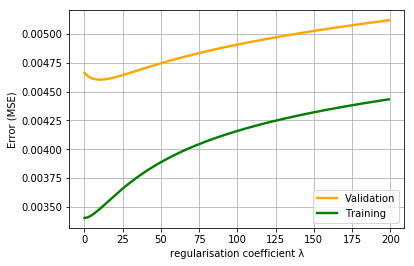

In [75]:
#with test data file as last parameter
# printActualPredicted(*predictProbAdmit("AdmissionDataset/data.csv",80,[1,2,3,4,5,6,7],8,False,"AdmissionDataset/testData.csv"))

#evaluation on 20% validation data
# printActualPredicted(*predictProbAdmit("AdmissionDataset/data.csv",80))
predictProbAdmit("AdmissionDataset/data.csv",80)
# predictProbAdmit("AdmissionDataset/data.csv",80,[1,2,3,4,5,6,7],8,False,"AdmissionDataset/testData.csv")

### 3.2. Performance of Mean square error loss function vs Mean Absolute error function vs Mean absolute percentage error function.

In [25]:
# MSE(*predictProbAdmit("AdmissionDataset/data.csv",80,[1,2,3,4,5,6,7],8,False,"AdmissionDataset/testData.csv")[:3])
# MAE(*predictProbAdmit("AdmissionDataset/data.csv",80,[1,2,3,4,5,6,7],8,False,"AdmissionDataset/testData.csv")[:3])
# MPE(*predictProbAdmit("AdmissionDataset/data.csv",80,[1,2,3,4,5,6,7],8,False,"AdmissionDataset/testData.csv")[:3])

MSE(*predictProbAdmit("AdmissionDataset/data.csv",80)[:3])
MAE(*predictProbAdmit("AdmissionDataset/data.csv",80)[:3])
MPE(*predictProbAdmit("AdmissionDataset/data.csv",80)[:3])

Mean Square Error =  0.004663968348542755
Mean Absolute Error =  0.04976955657387148
Mean Percentage Error =  -2.049160071628781


### 3.3 Behaviour of the coefficents:

A coefficient $'m'$ is known as the slope of a line or a plane or any other geometeric shape. It tells how much an dependent variable changes with a unit value change an independent variable.

Example: Consider an equation of the line $y = mx + c $. 
Here, $y$ is the dependent variable and $x$ is the indpendent variable and $m$ is the slope.

Here $c$ is the intercept made by the geomatric features given all the independent features set to $0$.

A positive coefficient means the slope is ascending.

A negative coefficient means the slope is descending.

Following coefficents and intercept observed:

**Intercept**

$$Intercept value=  -1.3397614394551653$$

**Coefficent**
$$GRE Score Coefficent=  0.002057980544864853$$

$$TOEFL Score Coefficent=  0.002612677744456003$$

$$University Rating Coefficent=  0.008676790804446203$$

$$SOP Coefficent=  -0.001952885191650225$$

$$LOR Coefficent=  0.015770404479405593$$

$$CGPA Coefficent=  0.1215084833212993$$

$$Research Coefficent=  0.023728480514227657$$

In [26]:
def visualize(trainFile,percent,onTraining=True):
    labels={1:"GRE Score",2:"TOEFL Score",3:"University Rating",4:"SOP",5:"LOR",6:"CGPA",7:"Research"}
    
    testRecords,testYs,predictions=predictProbAdmit(trainFile,percent,[1,2,3,4,5,6,7],8,onTraining)[:3]
    plt.scatter(testRecords[:,1],testYs,color="orange",label="Actual")
    plt.scatter(testRecords[:,1],predictions,color="green",label="Predicted")
    if onTraining:
        plt.xlabel("Training dataset")
    else:
        plt.xlabel("Validation dataset")
    plt.ylabel("Chance of Admit")
    plt.legend()
    plt.show()    
    
    for i in range(1,3):
        testRecords,testYs,predictions=predictProbAdmit(trainFile,percent,[i],8,onTraining)[:3]
        plt.scatter(testRecords[:,i],testYs,color="orange")
        plt.plot(testRecords[:,i],predictions,color="green",linewidth="2.4",label="Predicted")

        plt.xlabel(labels[i])
        plt.ylabel("Chance of Admit")
        plt.legend()
        plt.grid(True)

        plt.show()


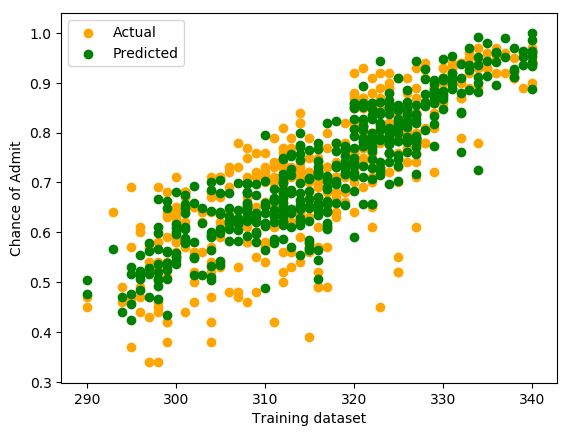

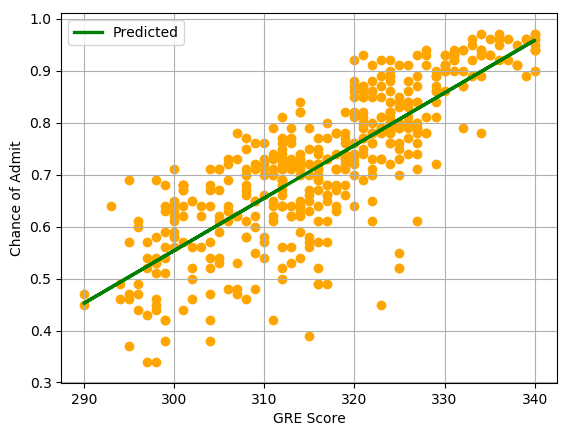

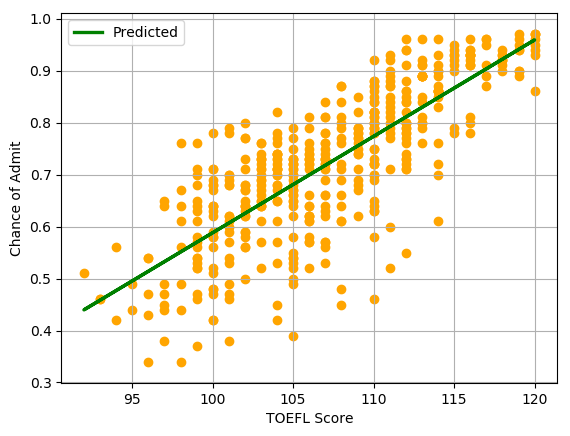

In [27]:
visualize("AdmissionDataset/data.csv",100,True)

### Comparision with scikit learn linear regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def skLearnReg(trainFile,trainDataPercent,unwantedCols,NANCols,targetIndex,testFile=None):
    if trainDataPercent==100:
        print("No Validation data (Training percent should be less than 100)")
        return
    data=pd.read_csv(trainFile).values
#     data=data.sample(frac=1)
    
    le = LabelEncoder()
    X=None
    for i in NANCols:
        data[:,i]=le.fit_transform(data[:,i])
    
    Y=data[:,targetIndex]
    X=np.delete(data,unwantedCols,axis=1)
    trainX,testX,trainY,testY=train_test_split(X,Y,test_size=(100-trainDataPercent)/100,shuffle=False)
    
    if testFile:
        testData=pd.read_csv(testFile).values
        for i in NANCols:
            testData[:,i]=le.fit_transform(testData[:,i])
        testY=testData[:,targetIndex]
        testX=np.delete(testData,unwantedCols,axis=1)
    
    model = LinearRegression()      
    reg=model.fit(trainX, trainY)  
#     print(reg.coef_)
#     print(reg.intercept_)
    predictedY=reg.predict(testX)
    print("========================")
    print("Mean square Error = ",mean_squared_error(testY,predictedY))
    print("Mean Absolute Error = ",mean_absolute_error(testY,predictedY))
    
    y_true, y_pred = np.array(testY), np.array(predictedY)
    print("Mean Percentage Error = ",np.mean((y_true - y_pred) / y_true) * 100)
    
    print("========================")
    print("%10s | %10s"%("Actual","Predicted"))
    print("========================")
    for actual,pred in zip(testY,predictedY):
        print("%10f | %10f"%(actual,pred))
    

In [29]:
skLearnReg("AdmissionDataset/data.csv",80,[0,8],[],8)
# skLearnReg("AdmissionDataset/data.csv",80,[0,8],[],8,"AdmissionDataset/data.csv")

Mean square Error =  0.004663968348538384
Mean Absolute Error =  0.049769556573882906
Mean Percentage Error =  -2.0491600715880027
    Actual |  Predicted
  0.480000 |   0.582122
  0.470000 |   0.455997
  0.530000 |   0.619233
  0.700000 |   0.553113
  0.780000 |   0.744111
  0.610000 |   0.658515
  0.740000 |   0.698205
  0.710000 |   0.748436
  0.930000 |   0.908077
  0.610000 |   0.555666
  0.530000 |   0.684506
  0.710000 |   0.743998
  0.800000 |   0.788140
  0.900000 |   0.906866
  0.960000 |   0.966200
  0.740000 |   0.715165
  0.940000 |   0.937956
  0.690000 |   0.774032
  0.820000 |   0.805371
  0.460000 |   0.439855
  0.910000 |   0.914994
  0.650000 |   0.706521
  0.710000 |   0.795502
  0.420000 |   0.625498
  0.790000 |   0.835197
  0.910000 |   0.878800
  0.870000 |   0.854953
  0.730000 |   0.618893
  0.780000 |   0.789254
  0.810000 |   0.740461
  0.570000 |   0.662171
  0.690000 |   0.634680
  0.870000 |   0.814494
  0.560000 |   0.701463
  0.880000 |   0.864077
  0.8